<a href="https://colab.research.google.com/github/abdullahalmohit/RNAseq-With-Python/blob/main/Human_and_Mice_From_DEG_to_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install and Load PyDESeq2

In [2]:
%pip install pydeseq2

In [3]:
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats

import pandas as pd

Load Data

In [4]:
counts = pd.read_csv('/content/Combined_RAW_Counts.csv')
counts

,Geneid,SRR6035978,SRR6035979,SRR6035980,SRR6035981,SRR6035982,SRR6035983
0,ENSG00000228037,2,2,6,8,6,3
1,ENSG00000142611,2,4,0,0,0,0
2,ENSG00000284616,0,0,0,0,0,0
3,ENSG00000157911,1042,1048,1174,929,1162,1288
4,ENSG00000260972,0,0,0,0,0,0
...,...,...,...,...,...,...,...
63135,ENSG00000271254,2170,2176,2792,3082,2540,2708
63136,ENSG00000275987,1,4,2,0,0,2
63137,ENSG00000268674,0,0,0,0,0,0
63138,ENSG00000277475,12,4,2,5,4,7


In [5]:
counts = counts.set_index('Geneid')
counts

,SRR6035978,SRR6035979,SRR6035980,SRR6035981,SRR6035982,SRR6035983
Geneid,,,,,,
ENSG00000228037,2,2,6,8,6,3
ENSG00000142611,2,4,0,0,0,0
ENSG00000284616,0,0,0,0,0,0
ENSG00000157911,1042,1048,1174,929,1162,1288
ENSG00000260972,0,0,0,0,0,0
...,...,...,...,...,...,...
ENSG00000271254,2170,2176,2792,3082,2540,2708
ENSG00000275987,1,4,2,0,0,2
ENSG00000268674,0,0,0,0,0,0


In [6]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,SRR6035978,SRR6035979,SRR6035980,SRR6035981,SRR6035982,SRR6035983
Geneid,,,,,,
ENSG00000228037,2,2,6,8,6,3
ENSG00000142611,2,4,0,0,0,0
ENSG00000157911,1042,1048,1174,929,1162,1288
ENSG00000224340,4,0,0,0,0,0
ENSG00000226374,0,2,0,0,2,0
...,...,...,...,...,...,...
ENSG00000276345,43,13,36,30,98,25
ENSG00000271254,2170,2176,2792,3082,2540,2708
ENSG00000275987,1,4,2,0,0,2


In [7]:
counts = counts.T
counts

Geneid,ENSG00000228037,ENSG00000142611,ENSG00000157911,ENSG00000224340,ENSG00000226374,ENSG00000142655,ENSG00000235054,ENSG00000149527,ENSG00000171621,ENSG00000224387,...,ENSG00000273748,ENSG00000277196,ENSG00000278817,ENSG00000278384,ENSG00000278066,ENSG00000276345,ENSG00000271254,ENSG00000275987,ENSG00000277475,ENSG00000275405
SRR6035978,2,2,1042,4,0,2720,2,2,525,0,...,425,129,13,350,4,43,2170,1,12,2
SRR6035979,2,4,1048,0,2,2653,0,2,447,0,...,429,173,18,345,0,13,2176,4,4,1
SRR6035980,6,0,1174,0,0,1818,4,51,625,2,...,358,303,40,625,0,36,2792,2,2,1
SRR6035981,8,0,929,0,0,1732,6,52,638,0,...,353,260,19,587,0,30,3082,0,5,0
SRR6035982,6,0,1162,0,2,1841,4,128,655,2,...,306,441,38,518,0,98,2540,0,4,1
SRR6035983,3,0,1288,0,0,1804,8,100,716,4,...,334,640,44,473,0,25,2708,2,7,0


In [8]:
metadata = pd.DataFrame(zip(counts.index, ['C','C','siEWSR1', 'siEWSR1', 'siFLI1', 'siFLI1']),
                        columns = ['Sample', 'Condition'])

In [9]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
SRR6035978,C
SRR6035979,C
SRR6035980,siEWSR1
SRR6035981,siEWSR1
SRR6035982,siFLI1
SRR6035983,siFLI1


In [10]:
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    design_factors="Condition"
)

/tmp/ipython-input-356573844.py:1: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(


Differential Expression Analysis

In [11]:
dds.deseq2()

Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 45.28 seconds.

Fitting dispersion trend curve...
... done in 1.75 seconds.

/usr/local/lib/python3.12/dist-packages/pydeseq2/dds.py:548: UserWarning: As the residual degrees of freedom is less than 3, the distribution of log dispersions is especially asymmetric and likely to be poorly estimated by the MAD.
  self.fit_dispersion_prior()
Fitting MAP dispersions...
... done in 46.77 seconds.

Fitting LFCs...
... done in 38.66 seconds.

Calculating cook's distance...
... done in 0.02 seconds.

Replacing 0 outlier genes.



In [12]:
dds

AnnData object with n_obs × n_vars = 6 × 40075
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals'
    varm: 'LFC'
    layers: 'normed_counts', '_mu_hat', 'cooks'

Initialize PyDESeq2 Statistical Analysis

In [13]:
stat_res = DeseqStats(dds, n_cpus=8, contrast = ('Condition','C','siEWSR1', 'siFLI1'))

In [14]:
stat_res.summary()

Running Wald tests...
... done in 28.81 seconds.



Log2 fold change & Wald test p-value: Condition C vs siEWSR1
                    baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                       
ENSG00000228037     4.421203       -1.714267  1.473555 -1.163354  0.244686   
ENSG00000142611     1.031741        4.141445  3.924196  1.055361  0.291260   
ENSG00000157911  1099.363518        0.093018  0.125740  0.739770  0.459440   
ENSG00000224340     0.656608        3.493410  4.966664  0.703372  0.481824   
ENSG00000226374     0.686908        2.584088  4.623485  0.558905  0.576227   
...                      ...             ...       ...       ...       ...   
ENSG00000276345    40.424666       -0.158386  0.657974 -0.240718  0.809774   
ENSG00000271254  2553.430647       -0.338304  0.099802 -3.389751  0.000700   
ENSG00000275987     1.512794        1.472971  2.622393  0.561690  0.574328   
ENSG00000277475     5.643210        1.258888  1.317292  0.955663  0.339242   
ENS

In [15]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
ENSG00000228037,4.421203,-1.714267,1.473555,-1.163354,0.244686,NaN
ENSG00000142611,1.031741,4.141445,3.924196,1.055361,0.291260,NaN
ENSG00000157911,1099.363518,0.093018,0.125740,0.739770,0.459440,0.601258
ENSG00000224340,0.656608,3.493410,4.966664,0.703372,0.481824,NaN
ENSG00000226374,0.686908,2.584088,4.623485,0.558905,0.576227,NaN
...,...,...,...,...,...,...
ENSG00000276345,40.424666,-0.158386,0.657974,-0.240718,0.809774,0.882461
ENSG00000271254,2553.430647,-0.338304,0.099802,-3.389751,0.000700,0.002214
ENSG00000275987,1.512794,1.472971,2.622393,0.561690,0.574328,NaN


In [16]:
res.to_csv("DESeq2_results_T_vs_C.csv")

Annotation

In [17]:
%pip install sanbomics

In [18]:
from sanbomics.tools import id_map

In [19]:
mapper = id_map(species = 'human')

In [20]:
res['Symbol'] = res.index.map(mapper.mapper)

In [21]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000228037,4.421203,-1.714267,1.473555,-1.163354,0.244686,NaN,AL139246.3
ENSG00000142611,1.031741,4.141445,3.924196,1.055361,0.291260,NaN,PRDM16
ENSG00000157911,1099.363518,0.093018,0.125740,0.739770,0.459440,0.601258,PEX10
ENSG00000224340,0.656608,3.493410,4.966664,0.703372,0.481824,NaN,NaN
ENSG00000226374,0.686908,2.584088,4.623485,0.558905,0.576227,NaN,LINC01345
...,...,...,...,...,...,...,...
ENSG00000276345,40.424666,-0.158386,0.657974,-0.240718,0.809774,0.882461,AC004556.3
ENSG00000271254,2553.430647,-0.338304,0.099802,-3.389751,0.000700,0.002214,AC240274.1
ENSG00000275987,1.512794,1.472971,2.622393,0.561690,0.574328,NaN,NaN


In [22]:
res = res[res.baseMean >= 10]

In [23]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000157911,1099.363518,0.093018,0.125740,0.739770,4.594399e-01,6.012576e-01,PEX10
ENSG00000142655,2087.986189,0.696202,0.089749,7.757206,8.682062e-15,8.545034e-14,PEX14
ENSG00000149527,55.286576,-4.589970,0.825830,-5.558007,2.728732e-08,1.549520e-07,PLCH2
ENSG00000171621,595.441419,-0.283416,0.143552,-1.974311,4.834637e-02,9.775841e-02,SPSB1
ENSG00000142583,853.925434,-0.706009,0.148742,-4.746541,2.069248e-06,9.520385e-06,SLC2A5
...,...,...,...,...,...,...,...
ENSG00000277196,322.213076,-0.792789,0.233525,-3.394879,6.865896e-04,2.176185e-03,AC007325.2
ENSG00000278817,28.340120,-0.814487,0.623874,-1.305531,1.917122e-01,3.065201e-01,AC007325.4
ENSG00000278384,476.703826,-0.703742,0.153311,-4.590280,4.426508e-06,1.955185e-05,AL354822.1


In [24]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]

In [25]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000142655,2087.986189,0.696202,0.089749,7.757206,8.682062e-15,8.545034e-14,PEX14
ENSG00000149527,55.286576,-4.589970,0.825830,-5.558007,2.728732e-08,1.549520e-07,PLCH2
ENSG00000142583,853.925434,-0.706009,0.148742,-4.746541,2.069248e-06,9.520385e-06,SLC2A5
ENSG00000173614,738.650570,-0.623131,0.133490,-4.668010,3.041312e-06,1.372171e-05,NMNAT1
ENSG00000142606,20.486282,-2.294961,0.789836,-2.905617,3.665293e-03,1.005702e-02,MMEL1
...,...,...,...,...,...,...,...
ENSG00000198727,179981.497370,-0.703892,0.080965,-8.693749,3.506711e-18,4.307960e-17,MT-CYB
ENSG00000210196,3900.925375,0.750755,0.107858,6.960559,3.389245e-12,2.764335e-11,MT-TP
ENSG00000275757,13.806725,-6.320489,2.705735,-2.335960,1.949333e-02,4.443035e-02,NaN


PCA

In [26]:
%pip install scanpy
import scanpy as sc

In [36]:
dds

AnnData object with n_obs × n_vars = 6 × 40075
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals', 'X_pca'
    varm: 'LFC', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks'

In [28]:
sc.tl.pca(dds)

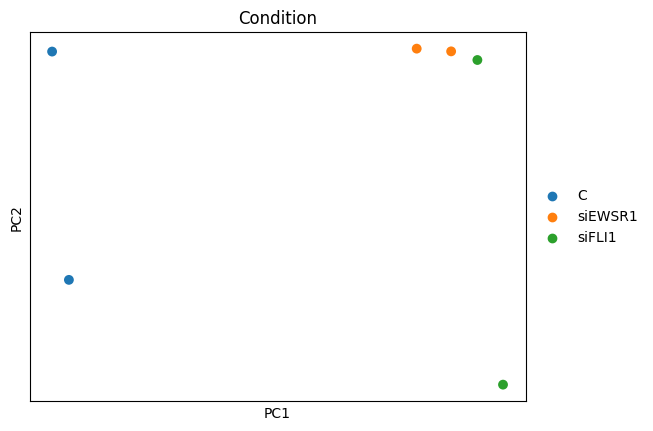

In [29]:
sc.pl.pca(dds, color = 'Condition', size = 200)

Gene Set Enrichment Analysis

In [31]:
!pip install gseapy
import gseapy as gp
from gseapy.plot import gseaplot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.3/605.3 kB 16.1 MB/s eta 0:00:00


In [32]:
ranking = res[['Symbol', 'stat']].dropna().sort_values('stat', ascending = False)
ranking

,Symbol,stat
Geneid,,
ENSG00000116761,CTH,37.026377
ENSG00000128965,CHAC1,34.719616
ENSG00000135069,PSAT1,34.153475
ENSG00000225177,NHSL1-AS1,33.232043
ENSG00000100889,PCK2,32.381819
...,...,...
ENSG00000112769,LAMA4,-51.197219
ENSG00000114270,COL7A1,-52.586058
ENSG00000198959,TGM2,-52.658872


In [33]:
ranking = ranking.drop_duplicates('Symbol')

In [34]:
ranking

,Symbol,stat
Geneid,,
ENSG00000116761,CTH,37.026377
ENSG00000128965,CHAC1,34.719616
ENSG00000135069,PSAT1,34.153475
ENSG00000225177,NHSL1-AS1,33.232043
ENSG00000100889,PCK2,32.381819
...,...,...
ENSG00000112769,LAMA4,-51.197219
ENSG00000114270,COL7A1,-52.586058
ENSG00000198959,TGM2,-52.658872


Manual Gene Set

In [35]:
manual_set = {
    'PRC2_Human': [
        'EZH1', 'EZH2', 'SUZ12', 'EED', 'RBBP4', 'RBBP7',
        'AEBP2', 'JARID2', 'MTF2', 'PHF1', 'PHF19', 'LCOR', 'LCORL'
    ]
}

In [37]:
pre_res = gp.prerank(rnk = ranking,
                     gene_sets = ['GO_Biological_Process_2021', manual_set],
                     seed = 6, permutation_num = 100)

In [38]:
out = []

for term in list(pre_res.results):
    out.append([term,
               pre_res.results[term]['fdr'],
               pre_res.results[term]['es'],
               pre_res.results[term]['nes']])

out_df = pd.DataFrame(out, columns = ['Term','fdr', 'es', 'nes']).sort_values('fdr').reset_index(drop = True)
out_df

,Term,fdr,es,nes
0,GO_Biological_Process_2021__artery morphogenes...,0.000000,-0.750686,-2.133828
1,GO_Biological_Process_2021__negative regulatio...,0.000000,-0.686532,-2.295250
2,GO_Biological_Process_2021__double-strand brea...,0.000000,0.558601,2.249596
3,GO_Biological_Process_2021__ciliary basal body...,0.000000,0.600464,2.206346
4,GO_Biological_Process_2021__sister chromatid s...,0.000000,0.815703,2.614181
...,...,...,...,...
2491,GO_Biological_Process_2021__TRIF-dependent tol...,0.998145,0.173182,0.498196
2492,GO_Biological_Process_2021__MyD88-independent ...,0.998145,0.173182,0.498196
2493,GO_Biological_Process_2021__tRNA 5'-end proces...,0.998427,0.165758,0.443410
2494,GO_Biological_Process_2021__regulation of glyc...,0.998483,0.176538,0.482547


In [39]:
out_df.sort_values('nes').iloc[0].Term

'GO_Biological_Process_2021__extracellular matrix organization (GO:0030198)'

[<Axes: xlabel='Gene Rank', ylabel='Ranked metric'>,
 <Axes: >,
 <Axes: >,
 <Axes: ylabel='Enrichment Score'>]

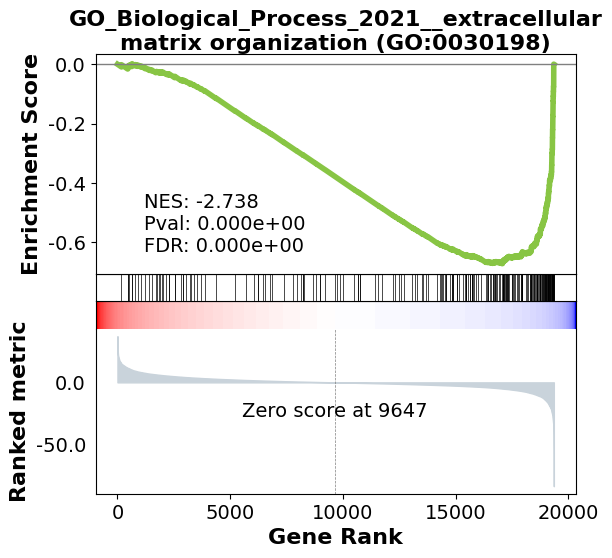

In [44]:
term_to_plot = 'GO_Biological_Process_2021__extracellular matrix organization (GO:0030198)'
term_details = pre_res.results[term_to_plot].copy()


if 'name' in term_details:
    del term_details['name']

gseaplot(
    rank_metric=pre_res.ranking,
    term=term_to_plot,
    **term_details
)

Heatmap

In [45]:
import numpy as np
import seaborn as sns

In [46]:
dds.layers['normed_counts']

array([[1.96982444e+00, 1.96982444e+00, 1.02627853e+03, ...,
        9.84912219e-01, 1.18189466e+01, 1.96982444e+00],
       [2.11030951e+00, 4.22061902e+00, 1.10580218e+03, ...,
        4.22061902e+00, 4.22061902e+00, 1.05515476e+00],
       [5.56900855e+00, 0.00000000e+00, 1.08966934e+03, ...,
        1.85633618e+00, 1.85633618e+00, 9.28168092e-01],
       [7.82231388e+00, 0.00000000e+00, 9.08366200e+02, ...,
        0.00000000e+00, 4.88894618e+00, 0.00000000e+00],
       [6.03341822e+00, 0.00000000e+00, 1.16847199e+03, ...,
        0.00000000e+00, 4.02227881e+00, 1.00556970e+00],
       [3.02234361e+00, 0.00000000e+00, 1.29759286e+03, ...,
        2.01489574e+00, 7.05213509e+00, 0.00000000e+00]])

In [47]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])
dds.layers['log1p']

array([[1.08850284, 1.08850284, 6.93466838, ..., 0.68557469, 2.55092428,
        1.08850284],
       [1.13472224, 1.65261598, 7.00923022, ..., 1.65261598, 1.65261598,
        0.72035115],
       [1.88236292, 0.        , 6.99454686, ..., 1.04953975, 1.04953975,
        0.65657038],
       [2.17728418, 0.        , 6.81274787, ..., 0.        , 1.77307706,
        0.        ],
       [1.95067282, 0.        , 7.06430764, ..., 0.        , 1.61388378,
        0.69592816],
       [1.39186472, 0.        , 7.16903654, ..., 1.10356525, 2.08593729,
        0.        ]])

In [48]:
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000142655,2087.986189,0.696202,0.089749,7.757206,8.682062e-15,8.545034e-14,PEX14
ENSG00000149527,55.286576,-4.589970,0.825830,-5.558007,2.728732e-08,1.549520e-07,PLCH2
ENSG00000142583,853.925434,-0.706009,0.148742,-4.746541,2.069248e-06,9.520385e-06,SLC2A5
ENSG00000173614,738.650570,-0.623131,0.133490,-4.668010,3.041312e-06,1.372171e-05,NMNAT1
ENSG00000142606,20.486282,-2.294961,0.789836,-2.905617,3.665293e-03,1.005702e-02,MMEL1
...,...,...,...,...,...,...,...
ENSG00000198727,179981.497370,-0.703892,0.080965,-8.693749,3.506711e-18,4.307960e-17,MT-CYB
ENSG00000210196,3900.925375,0.750755,0.107858,6.960559,3.389245e-12,2.764335e-11,MT-TP
ENSG00000275757,13.806725,-6.320489,2.705735,-2.335960,1.949333e-02,4.443035e-02,NaN


In [49]:
dds_sigs = dds[:, sigs.index]
dds_sigs

View of AnnData object with n_obs × n_vars = 6 × 7199
    obs: 'Condition', 'size_factors', 'replaceable'
    var: '_normed_means', 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', '_LFC_converged', 'replaced', 'refitted', '_pvalue_cooks_outlier'
    uns: 'trend_coeffs', 'disp_function_type', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', '_mu_LFC', '_hat_diagonals', 'X_pca'
    varm: 'LFC', 'PCs'
    layers: 'normed_counts', '_mu_hat', 'cooks', 'log1p'

/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.12/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


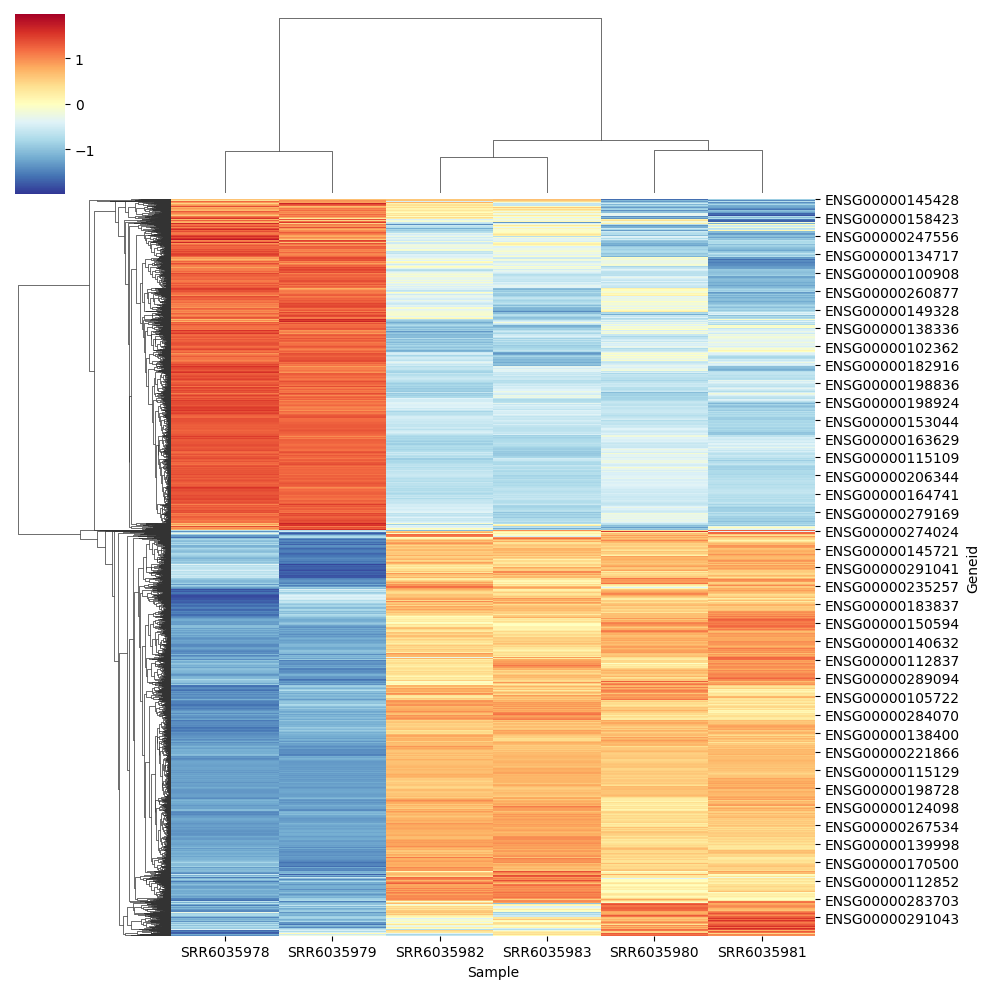

In [50]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [78]:
# The AnnData object `dds_sigs` does not have a `set_index` method.
# To create a DataFrame `df` with 'Symbol' as the index, we need to
# construct it from the `log1p` layer and then map the gene IDs to symbols.

# Create a DataFrame from the 'log1p' layer of dds_sigs.
# Transpose it so that genes are rows (index) and samples are columns.
df = pd.DataFrame(dds_sigs.layers['log1p'].T,
                  index=dds_sigs.var_names, # Current index is GeneIDs
                  columns=dds_sigs.obs_names) # Sample names are columns

# Map the current GeneID index to the corresponding gene Symbols using the `sigs` DataFrame.
# This creates a Series that can have NaN if a GeneID doesn't map to a Symbol.
df.index = sigs.loc[df.index, 'Symbol']

# CRUCIAL: Drop rows where the index itself (gene symbol) is NaN.
# The previous df.dropna(axis=0) only drops rows with NaN values in *columns*, not in the index.
df = df[df.index.notna()]

In [79]:
df

Sample,SRR6035978,SRR6035979,SRR6035980,SRR6035981,SRR6035982,SRR6035983
Symbol,,,,,,
PEX14,7.893558,7.937491,7.431542,7.435161,7.524158,7.505732
PLCH2,1.088503,1.134722,3.878188,3.948259,4.865324,4.622468
SLC2A5,6.223152,6.430325,6.926774,6.700196,6.948671,7.031173
NMNAT1,6.333963,6.218995,6.660141,6.757487,6.762480,6.764344
MMEL1,1.779107,2.126574,3.260422,3.589071,2.713235,3.618138
...,...,...,...,...,...,...
MT-TK,4.559666,4.459769,3.915874,3.869823,3.812094,4.032640
MT-CYB,11.779113,11.743394,12.209403,12.287692,12.293672,12.141492
MT-TP,8.620132,8.561022,8.132335,8.005023,8.154865,7.925318


In [80]:
dds_sub = df
dds_sub

Sample,SRR6035978,SRR6035979,SRR6035980,SRR6035981,SRR6035982,SRR6035983
Symbol,,,,,,
PEX14,7.893558,7.937491,7.431542,7.435161,7.524158,7.505732
PLCH2,1.088503,1.134722,3.878188,3.948259,4.865324,4.622468
SLC2A5,6.223152,6.430325,6.926774,6.700196,6.948671,7.031173
NMNAT1,6.333963,6.218995,6.660141,6.757487,6.762480,6.764344
MMEL1,1.779107,2.126574,3.260422,3.589071,2.713235,3.618138
...,...,...,...,...,...,...
MT-TK,4.559666,4.459769,3.915874,3.869823,3.812094,4.032640
MT-CYB,11.779113,11.743394,12.209403,12.287692,12.293672,12.141492
MT-TP,8.620132,8.561022,8.132335,8.005023,8.154865,7.925318


In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
manual_set = {
    'PRC2_Human': [
        'EZH1', 'EZH2', 'SUZ12', 'EED', 'RBBP4', 'RBBP7',
        'AEBP2', 'JARID2', 'MTF2', 'PHF1', 'PHF19', 'LCOR', 'LCORL'
    ]
}
prc2_genes = manual_set['PRC2_Human']

In [83]:
grapher = dds_sub

In [73]:
# After the previous cell, `grapher` (which is `dds_sub`) already has gene symbols as its index.
# Re-mapping with `mapper.mapper` which is designed for ENSG IDs can lead to incorrect mappings
# or new NaN values if the input is already gene symbols. This line is redundant and problematic.
# We will remove it, assuming the index is correctly set in the previous steps.
# grapher.index = grapher.index.map(mapper.mapper) # This line is removed.

In [84]:
grapher_prc2 = grapher.loc[grapher.index.intersection(prc2_genes)]

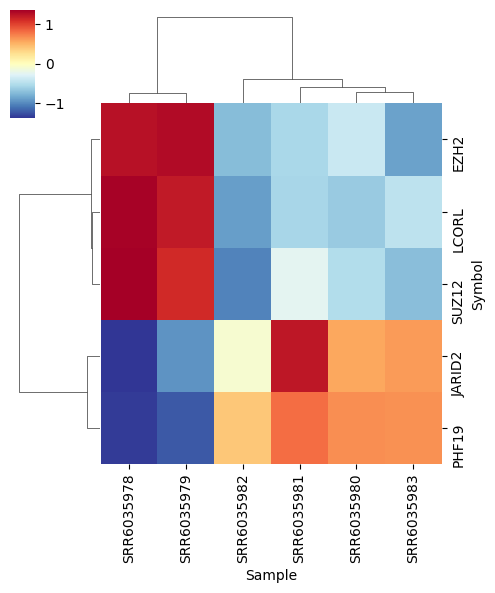

In [85]:
ax = sns.clustermap(
    grapher_prc2,
    z_score=0,                   # row-wise Z-score
    cmap='RdYlBu_r',
    figsize=(5, 6)
)

plt.show()

Volcano Plot

In [86]:
from sanbomics.plots import volcano

In [87]:
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Symbol
Geneid,,,,,,,
ENSG00000157911,1099.363518,0.093018,0.125740,0.739770,4.594399e-01,6.012576e-01,PEX10
ENSG00000142655,2087.986189,0.696202,0.089749,7.757206,8.682062e-15,8.545034e-14,PEX14
ENSG00000149527,55.286576,-4.589970,0.825830,-5.558007,2.728732e-08,1.549520e-07,PLCH2
ENSG00000171621,595.441419,-0.283416,0.143552,-1.974311,4.834637e-02,9.775841e-02,SPSB1
ENSG00000142583,853.925434,-0.706009,0.148742,-4.746541,2.069248e-06,9.520385e-06,SLC2A5
...,...,...,...,...,...,...,...
ENSG00000277196,322.213076,-0.792789,0.233525,-3.394879,6.865896e-04,2.176185e-03,AC007325.2
ENSG00000278817,28.340120,-0.814487,0.623874,-1.305531,1.917122e-01,3.065201e-01,AC007325.4
ENSG00000278384,476.703826,-0.703742,0.153311,-4.590280,4.426508e-06,1.955185e-05,AL354822.1


0s encountered for p value, imputing 1e-323
impute your own value if you want to avoid this


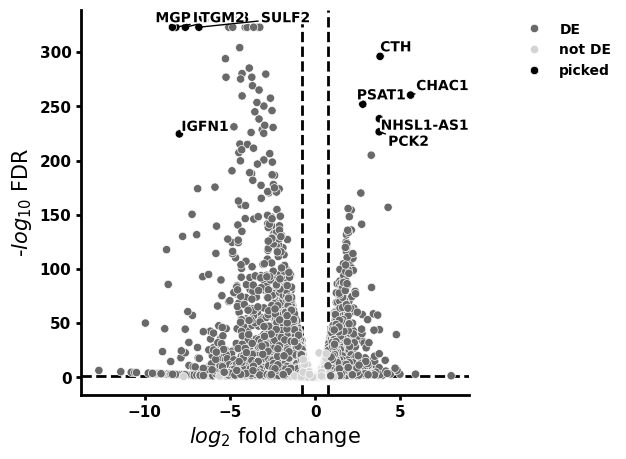

In [88]:
volcano(res, symbol='Symbol')

In [89]:
grapher.index

Index(['PEX14', 'PLCH2', 'SLC2A5', 'NMNAT1', 'MMEL1', 'TMEM51', 'RBP7',
       'GPR157', 'ZBTB40', 'SLC9A1',
       ...
       'MAP3K7CL', 'COL6A2', 'CU633906.2', 'PIGP', 'MT-ND1', 'MT-TK', 'MT-CYB',
       'MT-TP', 'AC007325.2', 'AL354822.1'],
      dtype='object', name='Symbol', length=6893)

0s encountered for p value, imputing 1e-323
impute your own value if you want to avoid this


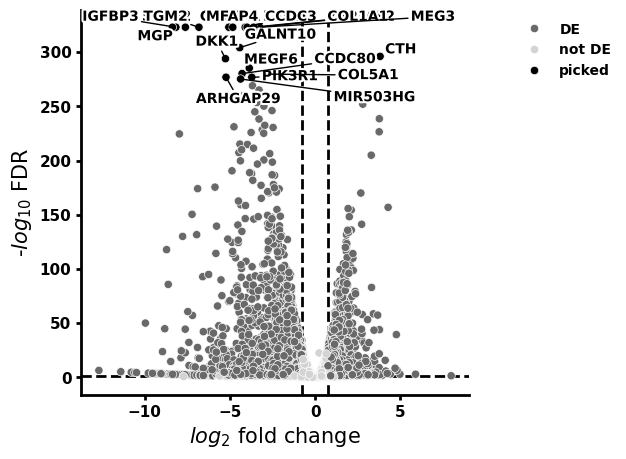

In [91]:
if 'padj' in sigs.columns and not sigs['padj'].isnull().all():
    # Sort by padj first (ascending), then by absolute log2FoldChange (descending)
    top_genes_to_label = sigs.sort_values(by=['padj', 'log2FoldChange'], ascending=[True, False]).head(20)
    genes_to_label_symbols = top_genes_to_label['Symbol'].dropna().tolist()
else:
    print("Warning: 'padj' column not suitable for sorting. Labeling only top 20 by log2FoldChange.")
    top_genes_to_label = sigs.sort_values(by='log2FoldChange', ascending=False).head(10)
    genes_to_label_symbols = top_genes_to_label['Symbol'].dropna().tolist() + \
                             sigs.sort_values(by='log2FoldChange', ascending=True).head(10)['Symbol'].dropna().tolist()


volcano(res, symbol='Symbol', to_label = genes_to_label_symbols)

KEGG pathway Enrichment Analysis

In [99]:
res = pd.read_csv("/content/DESeq2_results_T_vs_C.csv")

In [100]:
# Choose cutoffs
padj_cutoff = 0.05
log2fc_cutoff = 1.0

# Upregulated
up_genes = res[
    (res["padj"] < padj_cutoff) &
    (res["log2FoldChange"] > log2fc_cutoff)
]["Geneid"].tolist()

# Downregulated
down_genes = res[
    (res["padj"] < padj_cutoff) &
    (res["log2FoldChange"] < -log2fc_cutoff)
]["Geneid"].tolist()

# All DEGs
deg_list = up_genes + down_genes

In [101]:
!pip install gprofiler-official

In [103]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

In [104]:
kegg_res = gp.profile(
    organism="hsapiens",   # <--- Homo sapiens
    query=deg_list,        # your list of human DEGs
    sources=["KEGG"]       # KEGG pathway enrichment
)

print(kegg_res.head())

  source      native                              name       p_value  \
0   KEGG  KEGG:04512          ECM-receptor interaction  4.781348e-11   
1   KEGG  KEGG:04974  Protein digestion and absorption  6.963667e-08   
2   KEGG  KEGG:04151        PI3K-Akt signaling pathway  1.575845e-07   
3   KEGG  KEGG:04510                    Focal adhesion  8.330948e-07   
4   KEGG  KEGG:04020         Calcium signaling pathway  3.043833e-06   

   significant                       description  term_size  query_size  \
0         True          ECM-receptor interaction         89        1263   
1         True  Protein digestion and absorption        103        1263   
2         True        PI3K-Akt signaling pathway        356        1263   
3         True                    Focal adhesion        202        1263   
4         True         Calcium signaling pathway        251        1263   

   intersection_size  effective_domain_size  precision    recall    query  \
0                 42                   

In [105]:
import numpy as np

df = kegg_res.copy()
df = df[df["source"] == "KEGG"]             # keep only KEGG
df = df.sort_values("p_value")              # rank by p-value
df["-log10(p)"] = -np.log10(df["p_value"])
df = df.head(20)                            # top 20 KEGG pathways

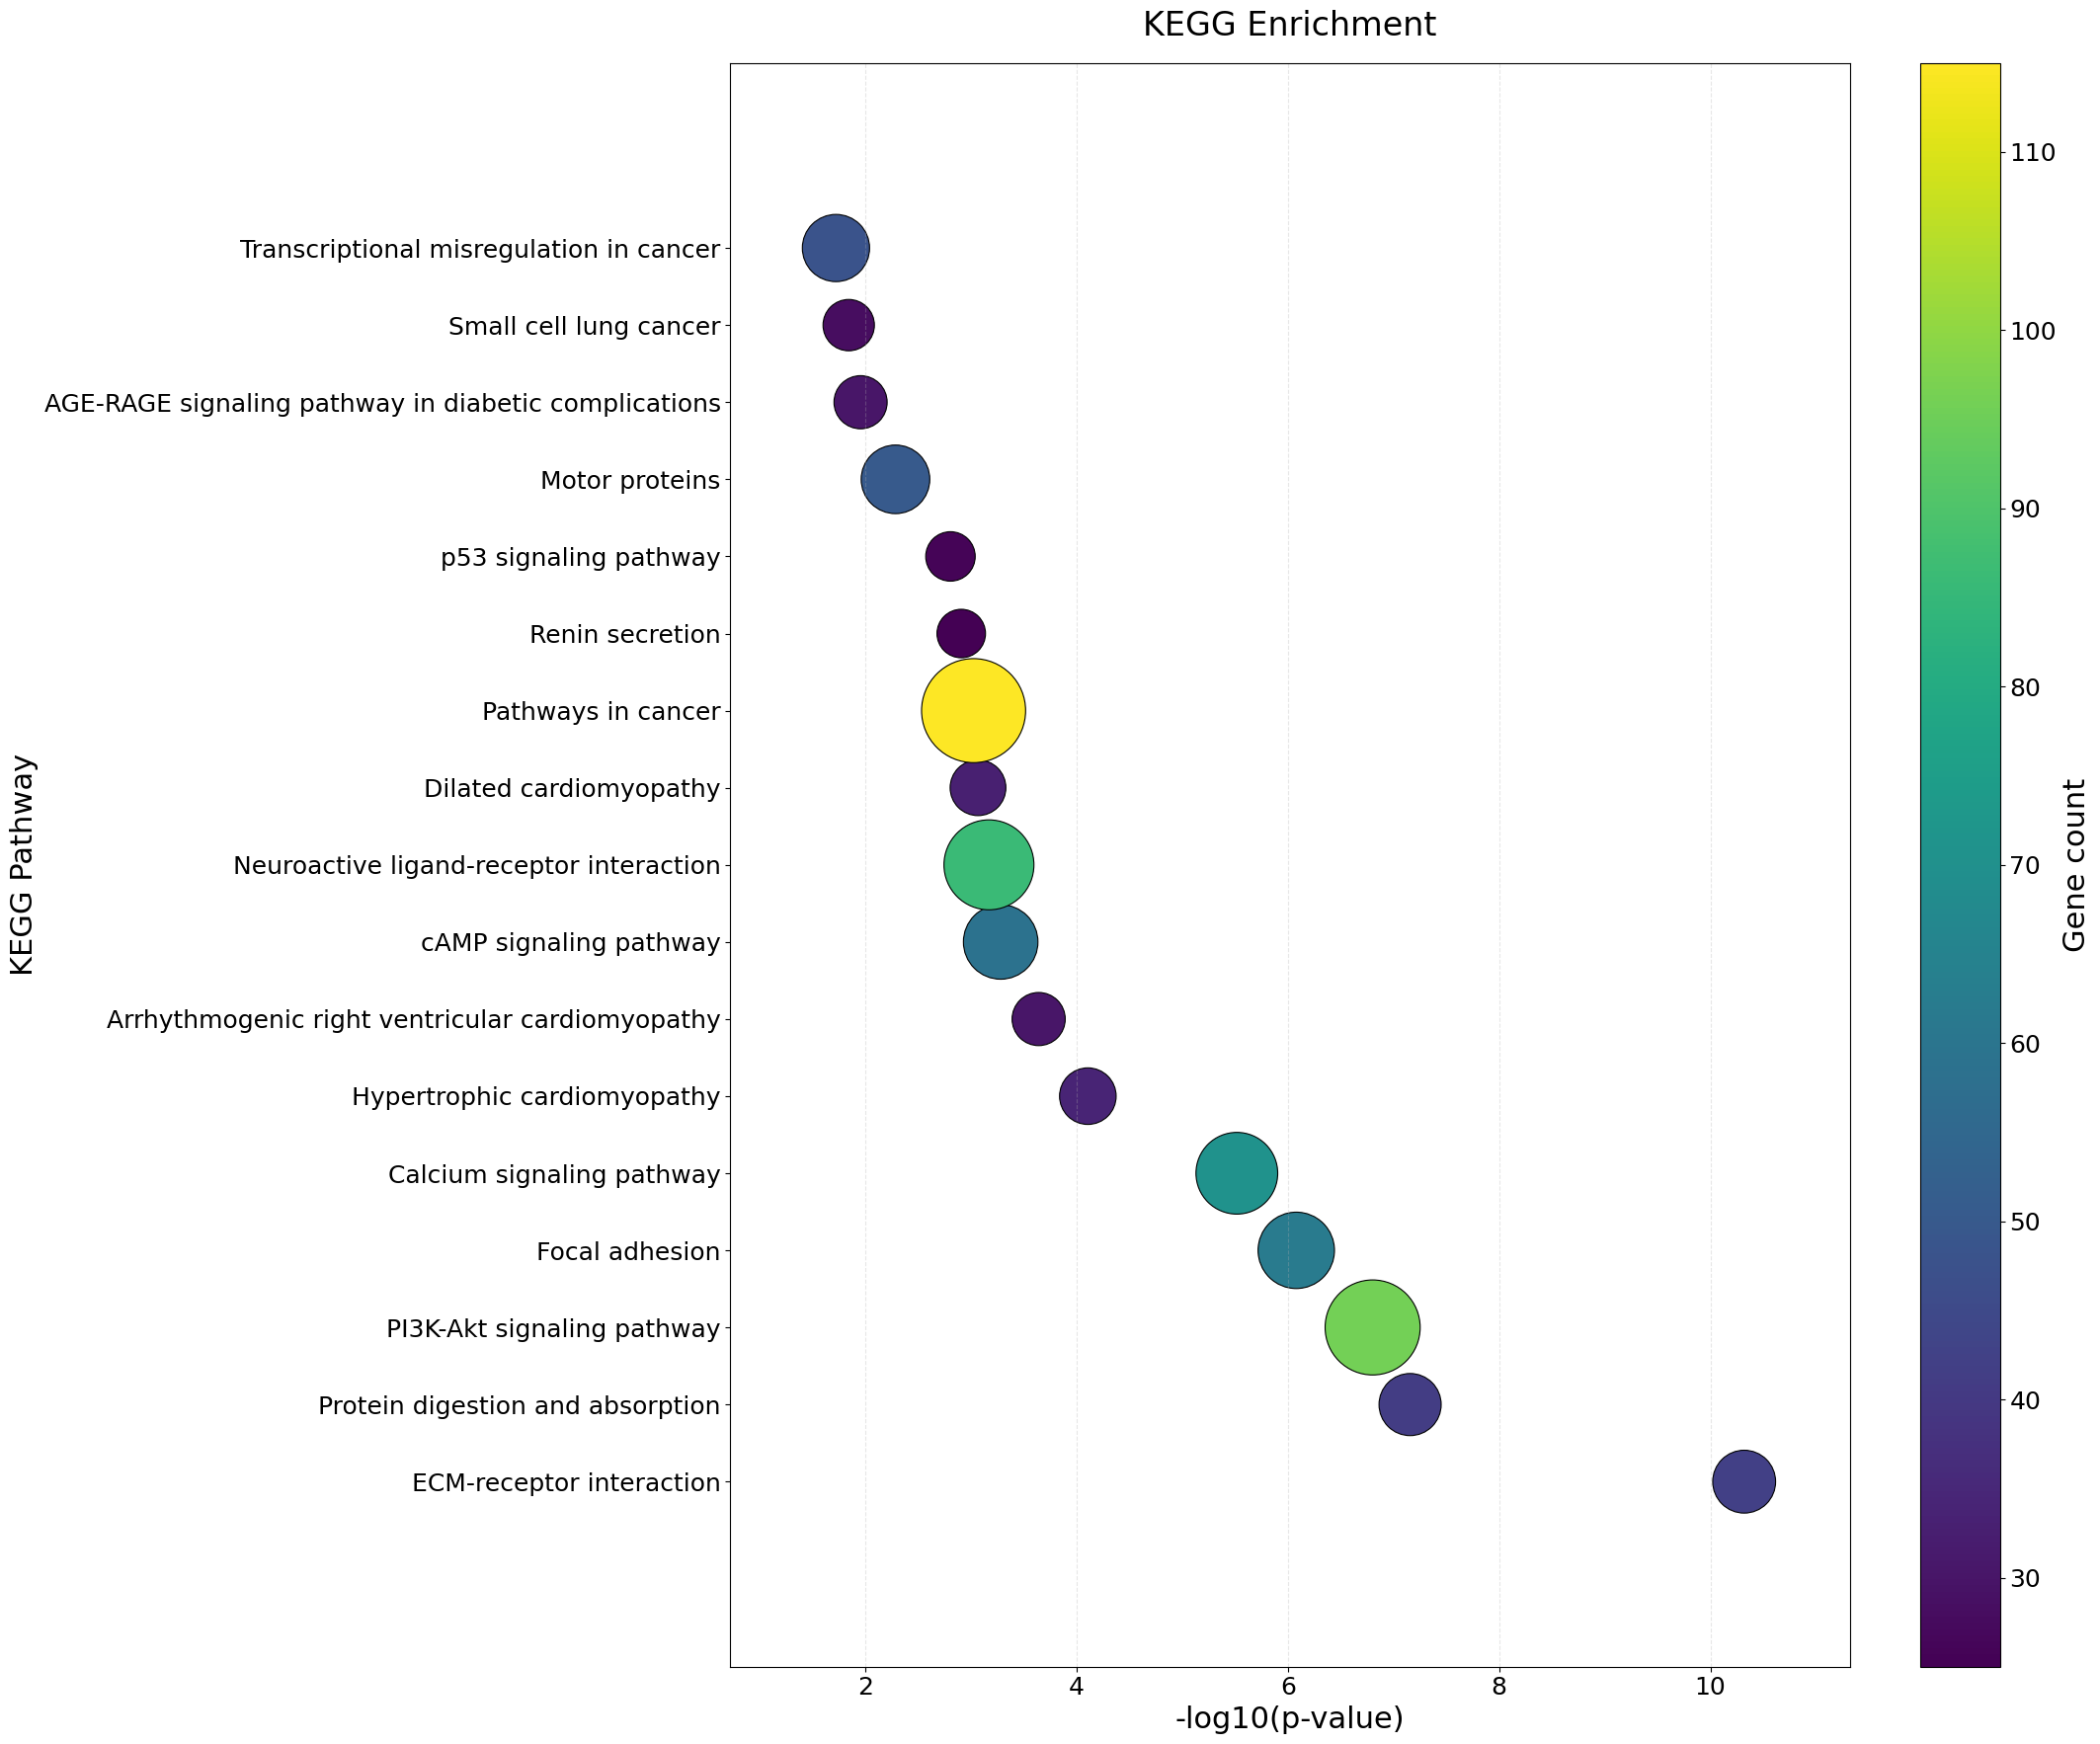

In [106]:
plt.figure(figsize=(22, 18))

# Font sizes
plt.rcParams.update({
    "font.size": 18,
    "axes.titlesize": 24,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18
})

# Scale bubble size down to fit
bubble_scale = 50   # <-- lower value = smaller bubbles

plt.scatter(
    df["-log10(p)"],
    df["name"],
    s=df["intersection_size"] * bubble_scale,
    c=df["intersection_size"],
    cmap="viridis",
    edgecolors="black",
    linewidth=0.8
)

# Colorbar
cbar = plt.colorbar(label="Gene count")
cbar.ax.tick_params(labelsize=18)

# Labels
plt.xlabel("-log10(p-value)")
plt.ylabel("KEGG Pathway")
plt.title("KEGG Enrichment", pad=20)

# Add margins so bubbles are not cut off
plt.margins(x=0.12, y=0.15)  # increase margin to make all bubbles fit

# Alternatively force x-axis boundaries with extra padding
xmin, xmax = df["-log10(p)"].min(), df["-log10(p)"].max()
plt.xlim(xmin - 1, xmax + 1)

plt.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()